In [15]:
import os
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt

In [16]:
model = YOLO('models/ISL-YOLOv8mBoundingBox.pt')

In [17]:
image = cv2.imread('images/img1.jpg')

results = model(image)

annotated_image = image.copy()


0: 384x640 1 sign, 733.9ms
Speed: 15.6ms preprocess, 733.9ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)


In [18]:
for result in results[0].boxes:
    if result.conf.item() >= 0.50:  # Only consider boxes with confidence >= 0.50
        x1, y1, x2, y2 = map(int, result.xyxy.tolist()[0])
        cv2.rectangle(annotated_image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        class_index = int(result.cls.item())
        class_name = model.names[class_index]
        label = f'{class_name} {result.conf.item():.2f}'
        cv2.putText(annotated_image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)

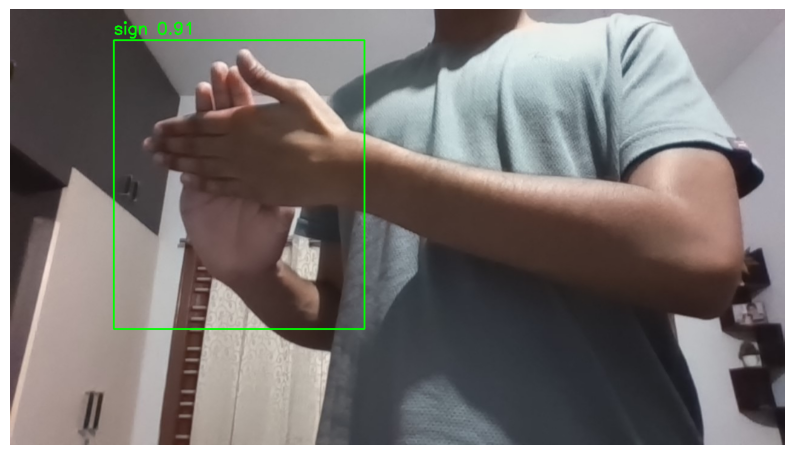

In [19]:
plt.figure(figsize=(10, 10))
plt.imshow(annotated_image_rgb)
plt.axis('off')
plt.show()

In [20]:
output_dir = 'images/Cropped Images/'
os.makedirs(output_dir, exist_ok=True)

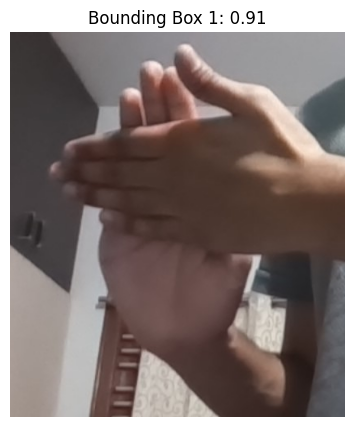

In [21]:
for i, result in enumerate(results[0].boxes):
    if result.conf.item() >= 0.50:  # Only consider boxes with confidence >= 0.50
        x1, y1, x2, y2 = map(int, result.xyxy.tolist()[0])
        bbox_image = image[y1:y2, x1:x2]
        bbox_image_rgb = cv2.cvtColor(bbox_image, cv2.COLOR_BGR2RGB)

        output_filename = os.path.join(output_dir, f'cropped_bbox_{i+1}.png')
        cv2.imwrite(output_filename, cv2.cvtColor(bbox_image_rgb, cv2.COLOR_RGB2BGR))

        plt.figure(figsize=(5, 5))
        plt.imshow(bbox_image_rgb)
        plt.axis('off')
        plt.title(f'Bounding Box {i+1}: {result.conf.item():.2f}')
        plt.show()